In [26]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split



In [27]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
import pandas as pd

print(mnist.data.shape)

/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


/opt/anaconda3/envs/pycaret_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [28]:
#testar vários classificadores com intuito de achar a melhor acurácia
print("Tipo do objeto mnist:", type(mnist))
print("\nAtributos disponíveis em mnist:")
print([attr for attr in dir(mnist) if not attr.startswith('_')])

Tipo do objeto mnist: <class 'sklearn.utils._bunch.Bunch'>

Atributos disponíveis em mnist:
['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [29]:
X, y = mnist.data, mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


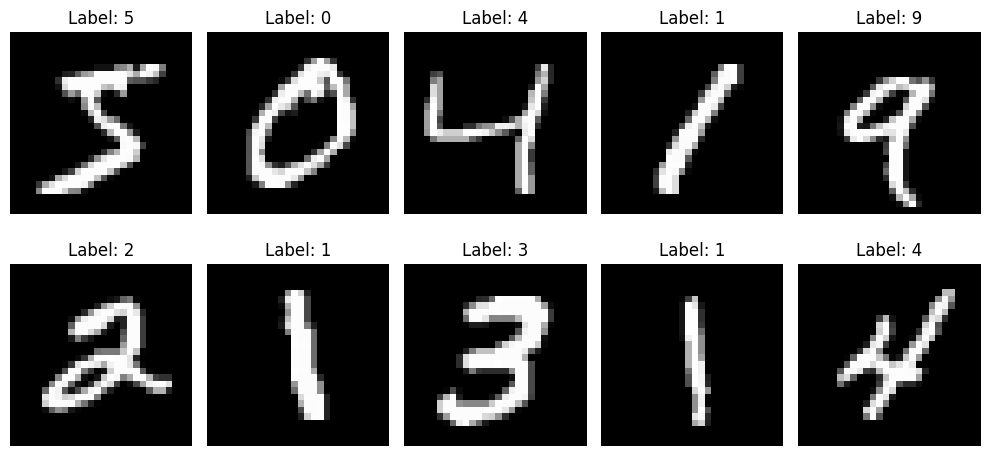

In [30]:
#ver algumas imagens do mnist.dataset
import matplotlib.pyplot as plt

# Exibir algumas imagens do MNIST
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y.iloc[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [31]:
#fazer um standard scaling em todos os dados x
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
#testando vários classificadores e escolhendo o melhor com scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Dicionário com todos os classificadores para testar
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=500),
    'K-Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Testar todos os classificadores
results = {}
print("Testando classificadores...\n")

for name, clf in classifiers.items():
    print(f"Treinando {name}...")
    start_time = time.time()
    
    # Treinar
    clf.fit(X_train, y_train)
    
    # Predizer
    y_pred = clf.predict(X_test)
    
    # Calcular acurácia
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f} ({accuracy*100:.2f}%) - Tempo: {end_time-start_time:.2f}s")

# Encontrar o melhor
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print(f"\n{'='*50}")
print(f"MELHOR CLASSIFICADOR: {best_classifier}")
print(f"MELHOR ACURÁCIA: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"{'='*50}")

# Mostrar ranking
print("\nRANKING DOS CLASSIFICADORES:")
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for i, (name, acc) in enumerate(sorted_results, 1):
    print(f"{i}. {name}: {acc*100:.2f}%")

Testando classificadores...

Treinando Logistic Regression...
Logistic Regression: 0.9166 (91.66%) - Tempo: 938.21s
Treinando Random Forest...
Random Forest: 0.9673 (96.73%) - Tempo: 21.59s
Treinando SVM...
SVM: 0.9631 (96.31%) - Tempo: 431.47s
Treinando Gradient Boosting...
Gradient Boosting: 0.9454 (94.54%) - Tempo: 1762.38s
Treinando MLP Neural Network...
MLP Neural Network: 0.9702 (97.02%) - Tempo: 648.48s
Treinando K-Neighbors...
K-Neighbors: 0.9461 (94.61%) - Tempo: 4.89s
Treinando Naive Bayes...
Naive Bayes: 0.5258 (52.58%) - Tempo: 0.62s
Treinando Decision Tree...
Decision Tree: 0.8705 (87.05%) - Tempo: 10.67s
Treinando AdaBoost...
AdaBoost: 0.7165 (71.65%) - Tempo: 36.73s

MELHOR CLASSIFICADOR: MLP Neural Network
MELHOR ACURÁCIA: 0.9702 (97.02%)

RANKING DOS CLASSIFICADORES:
1. MLP Neural Network: 97.02%
2. Random Forest: 96.73%
3. SVM: 96.31%
4. K-Neighbors: 94.61%
5. Gradient Boosting: 94.54%
6. Logistic Regression: 91.66%
7. Decision Tree: 87.05%
8. AdaBoost: 71.65%
9. Naiv

In [34]:
# Análise usando os modelos já treinados (sem retreinar)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Pegar os TOP 3 do ranking anterior
top_3_names = ['MLP Neural Network', 'Random Forest', 'SVM']

# Retreinar APENAS os TOP 3 (mais rápido que todos os 9)
top_3_classifiers = {
    'MLP Neural Network': MLPClassifier(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

predictions = {}
print("Retreinando apenas TOP 3 para análise (mais rápido)...")

for name, clf in top_3_classifiers.items():
    print(f"Treinando {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[name] = y_pred
    
print("Pronto para análise!")

Retreinando apenas TOP 3 para análise (mais rápido)...
Treinando MLP Neural Network...
Treinando Random Forest...
Treinando SVM...
Pronto para análise!


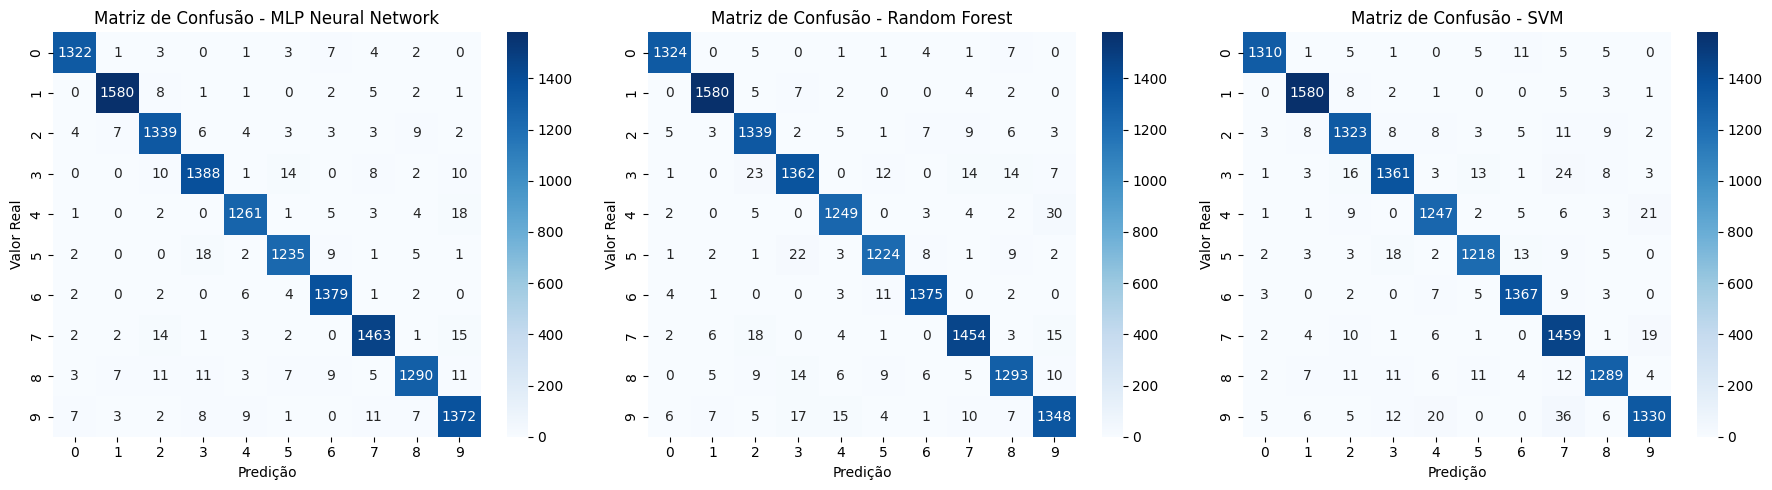

Acurácias dos modelos retreinados:
MLP Neural Network: 0.9735 (97.35%)
Random Forest: 0.9677 (96.77%)
SVM: 0.9631 (96.31%)


In [35]:
# 1. MATRIZES DE CONFUSÃO dos TOP 3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    # Criar matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotar heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], 
                xticklabels=range(10), yticklabels=range(10))
    axes[i].set_title(f'Matriz de Confusão - {name}')
    axes[i].set_xlabel('Predição')
    axes[i].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

# Calcular acurácias dos modelos retreinados
print("Acurácias dos modelos retreinados:")
for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f} ({acc*100:.2f}%)")